<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_5/5_1c_crosstab_and_cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUT vs QCut

Cut is a function which will BIN data into equally spaced bins, while QCut performs a "quantile" cut which bins data into roughly equal freqency or hight bins. 

https://towardsdatascience.com/sort-and-segment-your-data-into-bins-to-get-sorted-ranges-pandas-cut-and-qcut-7785931bbfde




In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ------------------------------------------------------------------
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [4]:
nba = pd.read_csv("/content/gdrive/MyDrive/2022-MGT/nba.csv")
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6-2,180.00,Texas,7730337.00
1,Jae Crowder,Boston Celtics,99.00,SF,25.00,6-6,235.00,Marquette,6796117.00
2,John Holland,Boston Celtics,30.00,SG,27.00,6-5,205.00,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6-5,185.00,Georgia State,1148640.00
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6-10,231.00,NaN,5000000.00


## Deal with Misisng Salary


---

Panda's .fillna() function will replace missing values with a specified value. 

```python
# -- fillna() to fill null values
df["column_w_nulls"] = df["column_w_nulls"].fillna(value="some-value")

```

In [5]:
nba['Salary'] = nba['Salary'].fillna(value=round(nba['Salary'].median(),2), inplace=False)
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6-2,180.00,Texas,7730337.00
1,Jae Crowder,Boston Celtics,99.00,SF,25.00,6-6,235.00,Marquette,6796117.00
2,John Holland,Boston Celtics,30.00,SG,27.00,6-5,205.00,Boston University,2839073.00
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6-5,185.00,Georgia State,1148640.00
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6-10,231.00,NaN,5000000.00


## Cut & Qcut functions 

Use `.cut()` when you need to segment and sort data values into bins. This function is also useful for transforming a continuous variable into a categorical variable. In our case we are going to cut salaries into 10 bins. 

Qcut “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into **equal sized bins**

https://pbpython.com/pandas-qcut-cut.html


```python
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
```
The major distinction is that qcut will calculate the size of each bin in order to make sure the **distribution of data in the bins is equal**. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.
```python
pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
```
https://towardsdatascience.com/how-i-customarily-bin-data-with-pandas-9303c9e4d946



In [6]:
nba['salary_cut_bin'] = pd.cut(nba['Salary'], bins=10)

nba['salary_cut_bin'].value_counts()

(5918.888, 2527799.2]       213
(2527799.2, 5024710.4]      103
(5024710.4, 7521621.6]       44
(7521621.6, 10018532.8]      27
(10018532.8, 12515444.0]     20
(12515444.0, 15012355.2]     18
(15012355.2, 17509266.4]     17
(17509266.4, 20006177.6]      8
(20006177.6, 22503088.8]      5
(22503088.8, 25000000.0]      3
Name: salary_cut_bin, dtype: int64

## Labeling Bins


---


You can label bins using cut in pandas. The cut function takes a pandas series as input and divides it into bins, returning an array of bin labels. The bin labels can be specified either as integer indices or custom labels.

```python
# Cut the series into 3 bins and specify custom labels for each bin
bins = [0, 2, 4, 6]
labels = ["Low", "Medium", "High"]
binned = pd.cut(s, bins, labels=labels)
```

you'll notice that you typically have 1 less label than bins. 

In [7]:
labels = ['low', 'medium', 'high', 'very high']
nba['salary_cut_bin'] = pd.cut(nba['Salary'], bins=4, labels=labels)

In [ ]:
nba.salary_cut_bin.value_counts()

low          342
medium        65
high          36
very high     15
Name: salary_cut_bin, dtype: int64

## QCUT Labels


---


Suppose i want to divide my players by salary as low, med, high, very high salaries. How can i do this with qcut? 

The `.qcut()` function can be used to label bins based on sample "quantiles". Unlike `.cut()`, which allows you to specify custom bin edges, `.qcut()` automatically computes the bin edges based on a specified number of equal-size bins.




In [8]:
labels = ['low', 'medium', 'high', 'very high']
nba['salary_quantiles_labelled'] = pd.qcut(nba['Salary'],
                                          q=4,
                                          labels=labels,
                                          precision=0)
nba['salary_quantiles_labelled'].value_counts()

low          119
medium       116
very high    115
high         108
Name: salary_quantiles_labelled, dtype: int64

In [9]:
res1 = nba.groupby(['salary_quantiles_labelled'])[['Salary']].agg(['mean','count']).reset_index()
res1

salary_quantiles_labelled      Salary      
                                   mean count
0                       low   724774.78   119
1                    medium  1920140.35   116
2                      high  4220984.71   108
3                 very high 12426566.59   115

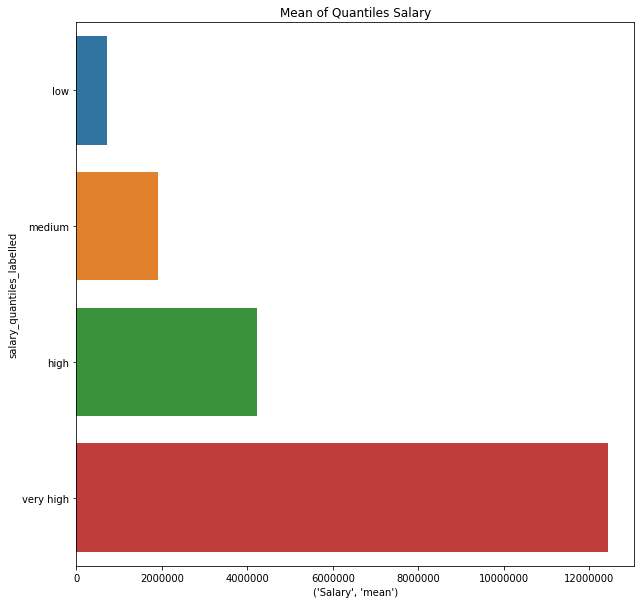

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(data = res1, 
            y='salary_quantiles_labelled', 
            x=('Salary','mean'))
plt.title("Mean of Quantiles Salary")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

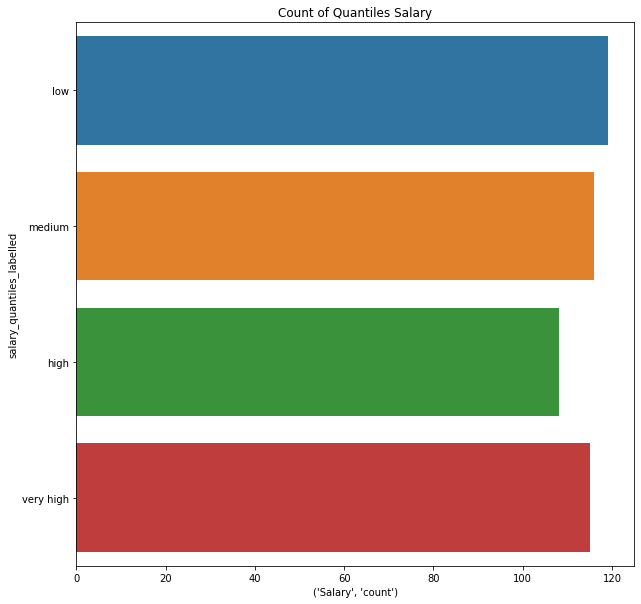

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(data = res1, 
            y='salary_quantiles_labelled', 
            x=('Salary','count'))
plt.title("Count of Quantiles Salary")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

## Custom Bins w. Cut()


---


You can specify custom bins with the `.cut()` function. The cut function takes as input a pandas series and an array of bin edges, and returns an array of bin labels.

```python

# Define custom bin edges
bins = [0, 2, 4, 6]

# Cut the series into custom bins and label each bin
binned = pd.cut(s, bins, labels=["Low", "Medium", "High"])

```

In [15]:
bin_breaks = [0,200000,1000000,10000000,np.inf]
bin_labels = ['low', 'medium','high', 'quite-high']

nba['salary_manual_bin_and_labelled'] = pd.cut(nba['Salary'],
                                          bins = bin_breaks,
                                          labels = bin_labels,
                                          )
nba['salary_manual_bin_and_labelled'].value_counts()

high          281
medium         95
quite-high     71
low            11
Name: salary_manual_bin_and_labelled, dtype: int64

In [12]:
res2 = nba.groupby(['salary_manual_bin_and_labelled'])[['Salary']].agg(['mean','count']).reset_index()
res2

salary_manual_bin_and_labelled      Salary      
                                        mean count
0                            low   110979.27    11
1                         medium   750051.93    95
2                           high  3711585.64   281
3                     quite-high 15189784.76    71

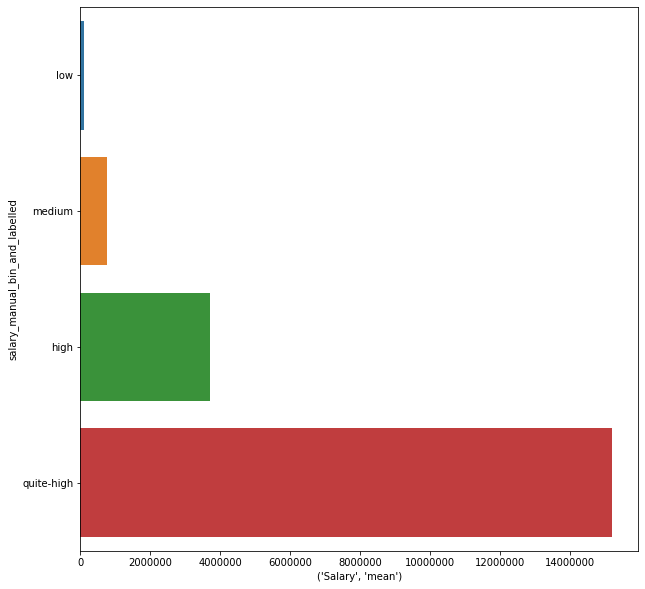

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(y=res2['salary_manual_bin_and_labelled'], x=res2[('Salary','mean')])
plt.ticklabel_format(style='plain', axis='x')


In [17]:
nba['salary_qcut_bin'] = pd.qcut(nba['Salary'], q=10)
nba['salary_qcut_bin'].value_counts()

(30887.999, 845059.0]       62
(2037168.0, 2839073.0]      52
(5189121.9, 8000000.0]      48
(13207714.2, 25000000.0]    46
(1254292.4, 2037168.0]      45
(3743184.0, 5189121.9]      45
(8000000.0, 13207714.2]     44
(947276.0, 1254292.4]       43
(2839073.0, 3743184.0]      40
(845059.0, 947276.0]        33
Name: salary_qcut_bin, dtype: int64

In [ ]:
res3 = nba.groupby(['salary_qcut_bin'])[['Salary']].agg('mean').reset_index()
res3

,salary_qcut_bin,Salary
0,"(30887.999, 845059.0]",492247.34
1,"(845059.0, 947276.0]",943047.15
2,"(947276.0, 1254292.4]",1091498.19
3,"(1254292.4, 2037168.0]",1574373.71
4,"(2037168.0, 2839073.0]",2491602.88
5,"(2839073.0, 3743184.0]",3168121.42
6,"(3743184.0, 5189121.9]",4412064.58
7,"(5189121.9, 8000000.0]",6490497.98
8,"(8000000.0, 13207714.2]",10481027.64
9,"(13207714.2, 25000000.0]",17107491.85


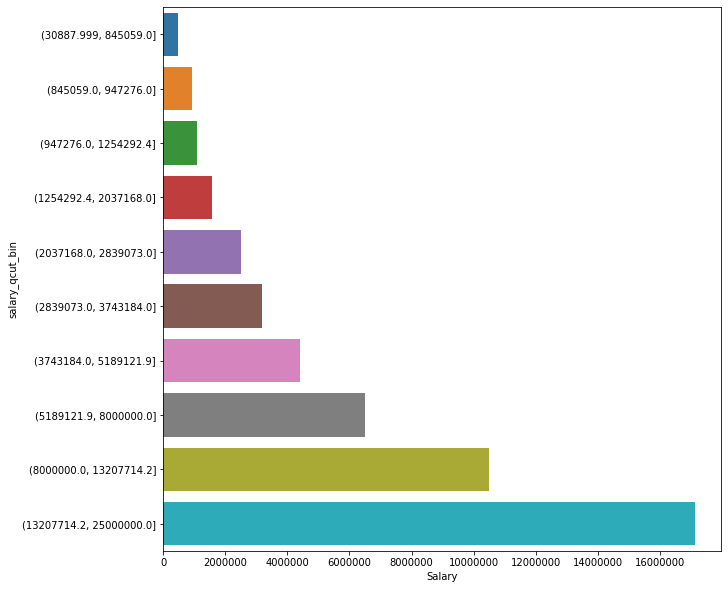

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=res3,  x='Salary', y='salary_qcut_bin')
plt.ticklabel_format(style='plain', axis='x')

## Generate your own bin ranges 


---

n Python, the range function is used to generate a sequence of numbers. The general syntax for using range is:

```python
range(start, stop, step)
```

we'll convert this into a list and then chop up or data. 

In [20]:
rng = list(range(0, 26000000, 1000000))
rng

[0,
 1000000,
 2000000,
 3000000,
 4000000,
 5000000,
 6000000,
 7000000,
 8000000,
 9000000,
 10000000,
 11000000,
 12000000,
 13000000,
 14000000,
 15000000,
 16000000,
 17000000,
 18000000,
 19000000,
 20000000,
 21000000,
 22000000,
 23000000,
 24000000,
 25000000]

In [21]:
nba['salary_1m_bin'] = pd.cut(nba['Salary'],
                                          bins=rng + [np.inf],
                                          labels=rng,
                                          )
nba['salary_1m_bin'].value_counts()

0           106
1000000      75
2000000      69
3000000      38
4000000      26
5000000      24
6000000      17
7000000      13
11000000     11
8000000      11
13000000     10
15000000      9
9000000       8
12000000      7
16000000      7
10000000      6
19000000      6
14000000      4
22000000      4
18000000      2
20000000      2
17000000      1
21000000      1
24000000      1
23000000      0
25000000      0
Name: salary_1m_bin, dtype: int64

In [22]:
res4 = nba.groupby('salary_1m_bin')[['Salary']].agg('mean').reset_index()
res4

,salary_1m_bin,Salary
0,0,683733.07
1,1000000,1372202.09
2,2000000,2568824.32
3,3000000,3519556.55
4,4000000,4511048.69
5,5000000,5423806.62
6,6000000,6595117.24
7,7000000,7679818.38
8,8000000,8438629.55
9,9000000,9601274.75


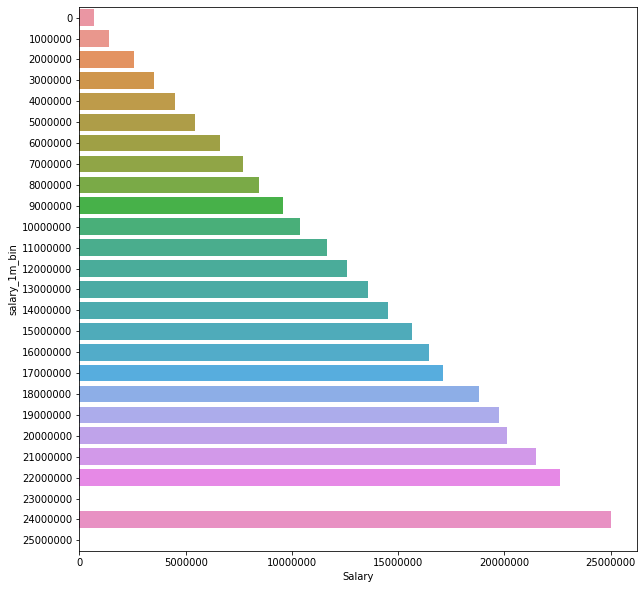

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(data=res4,  x='Salary', y='salary_1m_bin')
plt.ticklabel_format(style='plain', axis='x')